In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'


In [4]:
df=pd.read_csv(url)
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [5]:
df.dropna()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [8]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)
df

,Date,Temp
Date,,
1981-01-01,1981-01-01,20.7
1981-01-02,1981-01-02,17.9
1981-01-03,1981-01-03,18.8
1981-01-04,1981-01-04,14.6
1981-01-05,1981-01-05,15.8
...,...,...
1990-12-27,1990-12-27,14.0
1990-12-28,1990-12-28,13.6
1990-12-29,1990-12-29,13.5


In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
test_df=adfuller(df['Temp'])
test_df[0]

np.float64(-4.444804924611687)

In [11]:
test_df[1]

np.float64(0.00024708263003611164)

In [14]:
def adfuller_test(temp):
    result=adfuller(temp)
    labels=['statistical','p value','lag values','no of components']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <=0.05:
        print("stationary")
    else:
        print("non stationary")        

In [15]:
adfuller_test(df['Temp'])

statistical : -4.444804924611687
p value : 0.00024708263003611164
lag values : 20
no of components : 3629
stationary


In [46]:

import matplotlib.pyplot as plt

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

<Figure size 1200x800 with 0 Axes>

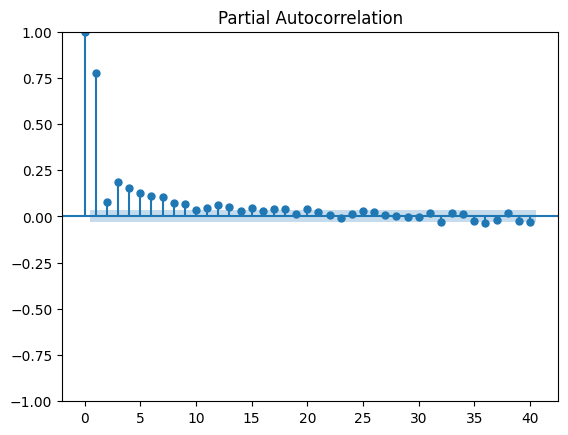

In [22]:
plt.figure(figsize=(12,8))
p_fig=plot_pacf(df['Temp'],lags=40)

<Figure size 1200x800 with 0 Axes>

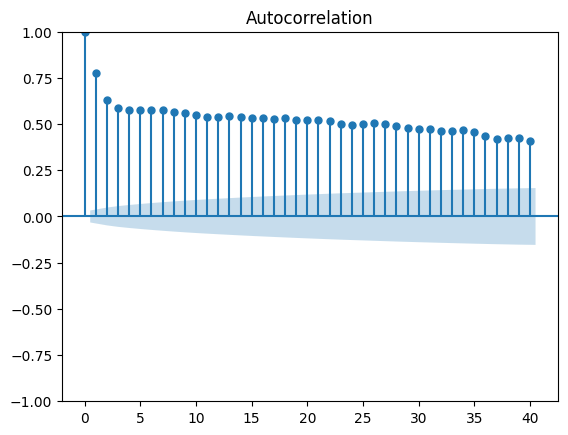

In [25]:
plt.figure(figsize=(12,8))
q_fig=plot_acf(df['Temp'],lags=40)

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
mod=ARIMA(df['Temp'],order=(2,0,1))
model=mod.fit()

c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Axes: xlabel='Date'>

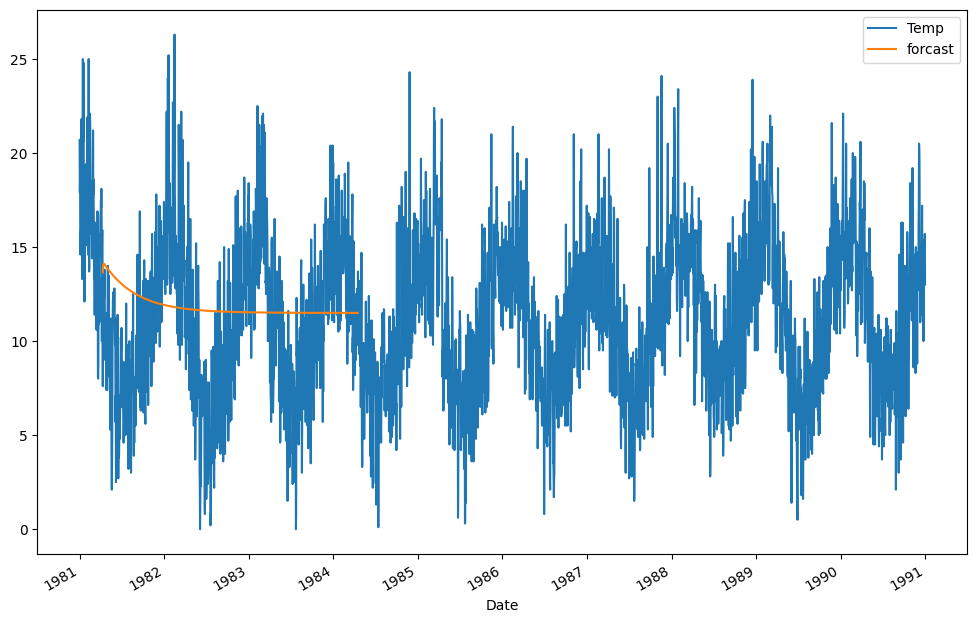

In [45]:
df['forcast']=model.predict(start=100,end=1200,dynamic=True)
df[['Temp','forcast']].plot(figsize=(12,8))

In [38]:
forecast=model.forecast(steps=12)

c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


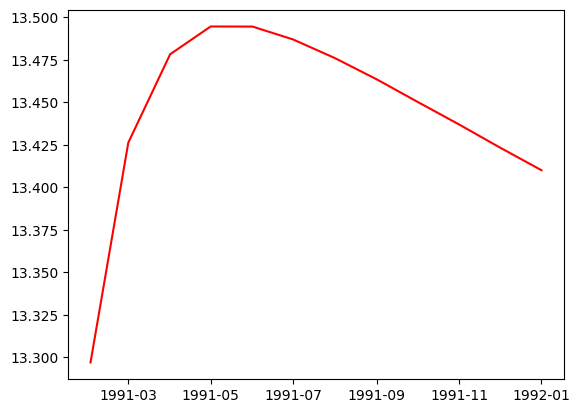

In [39]:
forecast_index = pd.date_range(start=df.index[-1], periods=12+1, freq='MS')[1:]
plt.plot(forecast_index, forecast, label='Forecast', color='red')